# Draft 1 - Figure 1

__Brainstormed Description:__  

_Maps Regional (IPCC) and Spatial (5x5deg) of a. Naive ToE, b. Strict ToE, and c. Delay (Strict minus Naive)_

So I will need to work with both the IPCC regional and 5x5 degree spatial data. This will be similar to figure 4 as well.

### Load functions and packages

In [103]:
import sys,warnings
# Add common resources folder to path
sys.path.append('/glade/u/home/jonahshaw/Scripts/git_repos/internalvar-vs-obsunc/')
sys.path.append('/glade/u/home/jonahshaw/Scripts/git_repos/internalvar-vs-obsunc/Common/')

from imports import (
    np, xr, plt, sns, os,
    glob, dask, gridspec,
    mpl
    )

from functions import to_png

%matplotlib inline

In [2]:
import regionmask

import cartopy.crs as ccrs
import matplotlib.patheffects as pe

from functions import sp_map

In [3]:
def compute_tte(obs_trends,pic_trends):
    '''
    General function comparing the observed trends with the PIC trends to determine TTE.
    '''
    
    _tte_bool = obs_trends > pic_trends
    _tte      = 1960 + _tte_bool.duration.where(~_tte_bool).max(dim='duration')
    _tte      = _tte.where(_tte!=1960+obs_trends.duration.max(),np.nan) # Mask the unemerged regions
    _tte      = _tte.drop(['percentile'])
    
    return _tte

## Spatial (5x5 deg.) Data

### Load processed trend data

#### Models

In [4]:
# I need to go from the CAM output variables to the CMOR/CMIP standard names.
pic_tseries_dir = '/glade/work/jonahshaw/trend_uncertainty/nathan/CMIP6_PIC/'
cesm1_dir       = 'CESM1/'
mpi_dir         = 'MPI-GE/'
canesm2_dir     = 'CanESM2/'
esm2m_dir       = 'ESM2M/'

cesm1_cmor_var_dict = {'ts':'TS','tas':'TREFHT','psl':'PSL'}

In [5]:
cesm1_spatial_trends_filepath   = glob.glob('%s/%s/*5x5degSpatialTrends.Percentiles*.nc' % (pic_tseries_dir,cesm1_dir))
mpi_spatial_trends_filepath     = glob.glob('%s/%s/*5x5degSpatialTrends.Percentiles*.nc' % (pic_tseries_dir,mpi_dir))
canesm2_spatial_trends_filepath = glob.glob('%s/%s/*5x5degSpatialTrends.Percentiles*.nc' % (pic_tseries_dir,canesm2_dir))
esm2m_spatial_trends_filepath   = glob.glob('%s/%s/*5x5degSpatialTrends.Percentiles*.nc' % (pic_tseries_dir,esm2m_dir))

In [6]:
cesm1_regional_trends_filepath   = glob.glob('%s/%s/*.trends.Percentiles*.nc' % (pic_tseries_dir,cesm1_dir))
mpi_regional_trends_filepath     = glob.glob('%s/%s/*.trends.Percentiles*.nc' % (pic_tseries_dir,mpi_dir))
canesm2_regional_trends_filepath = glob.glob('%s/%s/*.trends.Percentiles*.nc' % (pic_tseries_dir,canesm2_dir))
esm2m_regional_trends_filepath   = glob.glob('%s/%s/*.trends.Percentiles*.nc' % (pic_tseries_dir,esm2m_dir))

Load the trend data.

In [7]:
cesm1_pic_spatial_trends_all   = xr.open_dataarray(*cesm1_spatial_trends_filepath)

mpi_pic_spatial_trends_all     = xr.open_dataarray(*mpi_spatial_trends_filepath)

canesm2_pic_spatial_trends_all = xr.open_dataarray(*canesm2_spatial_trends_filepath)

esm2m_pic_spatial_trends_all   = xr.open_dataarray(*esm2m_spatial_trends_filepath)

In [8]:
cesm1_pic_regional_trends_all   = xr.open_dataarray(*cesm1_regional_trends_filepath)

mpi_pic_regional_trends_all     = xr.open_dataarray(*mpi_regional_trends_filepath)

canesm2_pic_regional_trends_all = xr.open_dataarray(*canesm2_regional_trends_filepath)

esm2m_pic_regional_trends_all   = xr.open_dataarray(*esm2m_regional_trends_filepath)

#### Observations

In [9]:
obs_tseries_dir = '/glade/work/jonahshaw/trend_uncertainty/nathan/OBS_LENS/'
gistemp_5x5_dir = 'GISTEMP_5x5/'
hadcrut5_dir    = 'HadCRUT5/'

In [10]:
gistemp_tas_var = 'tempAnom'
hadcrut5_tas_var = 'tas'

In [11]:
gistemp_5x5_spatial_trends_filepath  = glob.glob('%s/%s/*Spatial*.Percentiles*.nc' % (obs_tseries_dir,gistemp_5x5_dir))
hadcrut5_spatial_trends_filepath     = glob.glob('%s/%s/*Spatial*.Percentiles*.nc' % (obs_tseries_dir,hadcrut5_dir))

In [12]:
gistemp_5x5_regional_trends_filepath  = glob.glob('%s/%s/*.196001-202012.trends.Percentiles*.nc' % (obs_tseries_dir,gistemp_5x5_dir))
hadcrut5_regional_trends_filepath     = glob.glob('%s/%s/*.196001-202012.trends.Percentiles*.nc' % (obs_tseries_dir,hadcrut5_dir))

Load the trend data

In [13]:
gistemp_5x5_spatial_trends_all  = xr.open_dataarray(*gistemp_5x5_spatial_trends_filepath).drop('startyear')
hadcrut5_spatial_trends_all     = xr.open_dataarray(*hadcrut5_spatial_trends_filepath).drop('startyear').rename({'longitude':'lon','latitude':'lat'})

In [14]:
gistemp_5x5_regional_trends_all  = xr.open_dataarray(*gistemp_5x5_regional_trends_filepath).drop('startyear')
hadcrut5_regional_trends_all     = xr.open_dataarray(*hadcrut5_regional_trends_filepath).drop('startyear')

In [15]:
cesm1_pic_spatial_trends_all   = xr.open_dataarray(*cesm1_spatial_trends_filepath)

mpi_pic_spatial_trends_all     = xr.open_dataarray(*mpi_spatial_trends_filepath)

canesm2_pic_spatial_trends_all = xr.open_dataarray(*canesm2_spatial_trends_filepath)

esm2m_pic_spatial_trends_all   = xr.open_dataarray(*esm2m_spatial_trends_filepath)

In [16]:
cesm1_pic_regional_trends_all   = xr.open_dataarray(*cesm1_regional_trends_filepath)

mpi_pic_regional_trends_all     = xr.open_dataarray(*mpi_regional_trends_filepath)

canesm2_pic_regional_trends_all = xr.open_dataarray(*canesm2_regional_trends_filepath)

esm2m_pic_regional_trends_all   = xr.open_dataarray(*esm2m_regional_trends_filepath)

Combine to make calculation of time-of-emergence easier.

In [17]:
regional_percentiles_da = xr.concat([gistemp_5x5_regional_trends_all.assign_coords({'name':'GISTEMP_regional'}).expand_dims('name',axis=-1),
                                     hadcrut5_regional_trends_all.assign_coords({'name':'HadCRUT_regional'}).expand_dims('name',axis=-1),
                                     cesm1_pic_regional_trends_all.assign_coords({'name':'CESM1_regional'}).expand_dims('name',axis=-1),
                                     mpi_pic_regional_trends_all.assign_coords({'name':'MPI_regional'}).expand_dims('name',axis=-1),
                                     canesm2_pic_regional_trends_all.assign_coords({'name':'CanESM2_regional'}).expand_dims('name',axis=-1),
                                     esm2m_pic_regional_trends_all.assign_coords({'name':'ESM2M_regional'}).expand_dims('name',axis=-1)],
                                    dim='name')

In [18]:
spatial_percentiles_da = xr.concat([gistemp_5x5_spatial_trends_all.assign_coords({'name':'GISTEMP_spatial'}).expand_dims('name',axis=-1),
                                    hadcrut5_spatial_trends_all.assign_coords({'name':'HadCRUT_spatial'}).expand_dims('name',axis=-1),
                                    cesm1_pic_spatial_trends_all.assign_coords({'name':'CESM1_spatial'}).expand_dims('name',axis=-1),
                                    mpi_pic_spatial_trends_all.assign_coords({'name':'MPI_spatial'}).expand_dims('name',axis=-1),
                                    canesm2_pic_spatial_trends_all.assign_coords({'name':'CanESM2_spatial'}).expand_dims('name',axis=-1),
                                    esm2m_pic_spatial_trends_all.assign_coords({'name':'ESM2M_spatial'}).expand_dims('name',axis=-1)],
                                   dim='name')

### Compute TTE generally

In [19]:
obs_spatial_trend_percentiles_dict  = {'GISTEMP_5x5':gistemp_5x5_spatial_trends_all,
                                       'HadCRUT':hadcrut5_spatial_trends_all}
obs_regional_trend_percentiles_dict = {'GISTEMP_5x5':gistemp_5x5_regional_trends_all,
                                       'HadCRUT':hadcrut5_regional_trends_all}
obs_trend_percentiles_dict          = {'spatial':obs_spatial_trend_percentiles_dict,
                                       'regional':obs_regional_trend_percentiles_dict}

model_spatial_trend_percentiles_dict = {'CESM1':cesm1_pic_spatial_trends_all,
                                        'MPI':mpi_pic_spatial_trends_all,
                                        'CanESM2':canesm2_pic_spatial_trends_all,
                                        'ESM2M':esm2m_pic_spatial_trends_all}

model_regional_trend_percentiles_dict = {'CESM1':cesm1_pic_regional_trends_all,
                                         'MPI':mpi_pic_regional_trends_all,
                                         'CanESM2':canesm2_pic_regional_trends_all,
                                         'ESM2M':esm2m_pic_regional_trends_all}
model_trend_percentiles_dict          = {'spatial':model_spatial_trend_percentiles_dict,
                                         'regional':model_regional_trend_percentiles_dict}

In [20]:
%%time 

spatial_box = []
regional_box = []

# Iterate over regional vs. spatial
for _location_type in list(obs_trend_percentiles_dict.keys()):
    
    print(_location_type)
    _box = spatial_box if (_location_type == 'spatial') else regional_box
    location_box = []
    
    _allobs_trend_percentiles = obs_trend_percentiles_dict[_location_type]
    _allmodel_trend_percentiles = model_trend_percentiles_dict[_location_type]
    
    for _obs_product in list(_allobs_trend_percentiles.keys()):
        print(_obs_product)
        obs_box = []
        
        _obs_trend_percentiles = _allobs_trend_percentiles[_obs_product]
        
        for _model_product in list(_allmodel_trend_percentiles.keys()):
            print(_model_product)
            _model_trend_percentiles = _allmodel_trend_percentiles[_model_product]
            
            _mean_toe = compute_tte(obs_trends=_obs_trend_percentiles.sel(percentile=50.0),
                                    pic_trends=_model_trend_percentiles.sel(percentile=97.5))
            
            _strict_toe = compute_tte(obs_trends=_obs_trend_percentiles.sel(percentile=2.5),
                                      pic_trends=_model_trend_percentiles.sel(percentile=97.5))
            
            # Compute the delay and conditional delay mask:
            _delay_toe = _strict_toe - _mean_toe # Compute the delay
            _delay_undef_region = np.bitwise_and(np.isnan(_strict_toe), ~np.isnan(_mean_toe)) # Mask for where tas is emerged in the mean but not the "strict" sense.
            _delay_toe = xr.where(_delay_undef_region,2020 - _mean_toe,_delay_toe) # Apply the conditional mask

            _toes = xr.concat([_mean_toe.assign_coords({'metric':'mean'},).expand_dims(['metric'],axis=[-1]),
                               _strict_toe.assign_coords({'metric':'strict'},).expand_dims(['metric'],axis=[-1]),
                               _delay_toe.assign_coords({'metric':'delay'},).expand_dims(['metric'],axis=[-1]),
                               _delay_undef_region.assign_coords({'metric':'delay_mask'},).expand_dims(['metric'],axis=[-1]),
                              ],
                              dim='metric',
                             )            
                              
            obs_box.append(_toes.assign_coords({'model':_model_product},).expand_dims(['model'],axis=[-1]))
                        
        location_box.append(xr.concat(obs_box,dim='model').assign_coords({'obs':_obs_product},).expand_dims(['obs'],axis=[-1]))
        
    _box.append(xr.concat(location_box,dim='obs'))
    # _box.append(xr.concat(location_box,dim='obs').assign_coords({'location':_location_type},).expand_dims(['location'],axis=[-1]))    

spatial
GISTEMP_5x5
CESM1
MPI
CanESM2
ESM2M
HadCRUT
CESM1
MPI
CanESM2
ESM2M
regional
GISTEMP_5x5
CESM1
MPI
CanESM2
ESM2M
HadCRUT
CESM1
MPI
CanESM2
ESM2M
CPU times: user 347 ms, sys: 18.1 ms, total: 365 ms
Wall time: 375 ms


### Plot with IPCC Regions

Need to convert the IPCC Region Indexing to lat-lon coordinates in order to plot spatially.

In [21]:
%%time

# User set-up
data  = regional_box[0]

mean_data   = data.sel(metric='mean')
strict_data = data.sel(metric='strict')
delay_data  = data.sel(metric='delay')
delay_mask  = data.sel(metric='delay_mask')

# ipcc_ar6_regions_land   = regionmask.defined_regions.ar6.land
ipcc_ar6_regions_all    = regionmask.defined_regions.ar6.all

# unc_mask = ipcc_ar6_regions_land.mask(np.arange(-179.5, 180, 0.5),np.arange(-89.5, 90, 0.5),)
unc_mask = ipcc_ar6_regions_all.mask(np.arange(-179.5, 180, 0.5),np.arange(-89.5, 90, 0.5),)

# CESM1-GISTEMP 5x5
_mean_mask   = unc_mask.copy()
_strict_mask = unc_mask.copy()
_delay_data_mask  = unc_mask.copy()
_delay_mask_mask  = unc_mask.copy()

del unc_mask

offset = -1000 # Need an offset or it may confuse regions with the delays (delays are on [0,40] similar to the region indices)
for i in ipcc_ar6_regions_all.numbers:
    
    _mean_mask   = xr.where(_mean_mask==i,mean_data.sel(RegionIndex=i)+offset,_mean_mask)
    _strict_mask = xr.where(_strict_mask==i,strict_data.sel(RegionIndex=i)+offset,_strict_mask)
    _delay_data_mask  = xr.where(_delay_data_mask==i,delay_data.sel(RegionIndex=i)+offset,_delay_data_mask)
    _delay_mask_mask  = xr.where(_delay_mask_mask==i,delay_mask.sel(RegionIndex=i)+offset,_delay_mask_mask)

regional_masked_da = xr.concat([_mean_mask,_strict_mask,_delay_data_mask,_delay_mask_mask],dim='metric')-offset

CPU times: user 2.14 s, sys: 150 ms, total: 2.28 s
Wall time: 2.62 s


In [149]:
# Function for the regional figures.
def plot_regional_toe_and_delay(data,obs,model,title=True):
    
    data_subset     = data.sel(obs=obs,model=model)
    data_mean       = data_subset.sel(metric='mean')
    data_strict     = data_subset.sel(metric='strict')
    data_delay      = data_subset.sel(metric='delay')
    data_delay_mask = data_subset.sel(metric='delay_mask')

    fig,axs = sp_map(1,3,projection=ccrs.Robinson(),figsize=(21,6))
    axs = axs.flat

    cax1 = plt.axes([0.18, 0.22, 0.40, 0.03])
    cax2 = plt.axes([0.675, 0.22, 0.20, 0.03])

    delay_cmap = sns.light_palette('red',n_colors=10,reverse=False,as_cmap=True)
    delay_cmap.set_over('magenta')
    delay_levels = list(np.linspace(0,20,11))
    
    masks  = [data_mean,data_strict,data_delay]
    titles = ['Mean ToE','Strict ToE','Observational delay']
    levels = [np.linspace(1960,2020,13),np.linspace(1960,2020,13),delay_levels] 
    cmaps  = ['viridis','viridis',delay_cmap]
    # cmaps = ['viridis','viridis','rocket_r']
    extend = ['neither','neither','max']

    plt.subplots_adjust(wspace=0.05)

    ims = [] 
    for _ax,_mask,_label,_levels,_cmap,_extend in zip(axs,masks,titles,levels,cmaps,extend):

        im = _ax.contourf(_mask.lon,_mask.lat,_mask, 60,
                          transform=ccrs.PlateCarree(),
                          levels=_levels,
                          cmap=_cmap,
                          extend=_extend,
                         )

        _ax.coastlines()
        _ax.set_global()
        _ax.set_title(_label,fontsize=16)

        ims.append(im)

    _ = axs[2].contourf(data_delay_mask.lon,data_delay_mask.lat,data_delay_mask, levels=[0,0.5,2], colors='none',
                        transform=ccrs.PlateCarree(),
                        hatches=[None,'\\\\',],
                        extend='max',
                       )

    grey = axs[2].contourf(data_delay.lon,data_delay.lat,np.isnan(data_delay),
                           transform=ccrs.PlateCarree(),
                           extend='max',colors=['none','gray'],levels=[0,0.5,1.5],
                          )

    cbar1 = fig.colorbar(ims[0],orientation='horizontal',
                         ticks=np.linspace(1960,2020,13),
                         cax=cax1,
                        )

    cbar2 = fig.colorbar(ims[2],orientation='horizontal',
                         ticks=np.linspace(0,20,11), # delay_levels, 
                         cax=cax2,
                        )

    cbar1.ax.tick_params(labelsize=12) 
    cbar2.ax.tick_params(labelsize=12)
    
    if title:
        fig.suptitle('IPCC Region Emergence: %s-%s' % (model,obs),fontsize=20,y=0.88)
    
    return fig

It works.

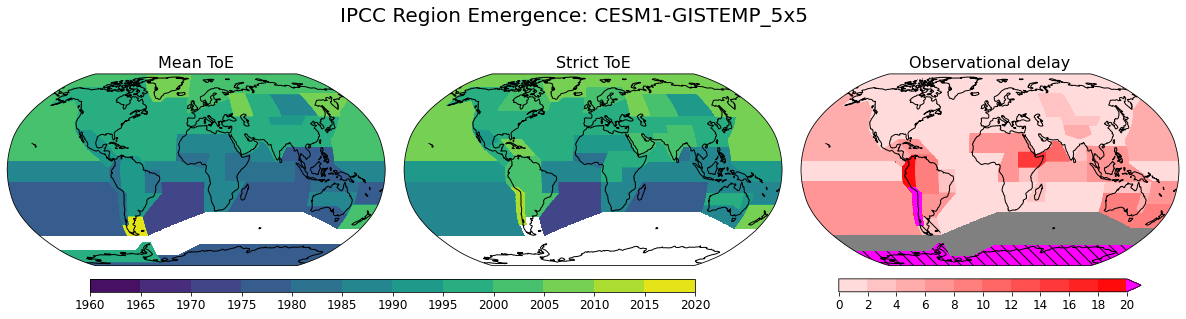

In [23]:
out_fig = plot_regional_toe_and_delay(regional_masked_da,obs='GISTEMP_5x5',model='CESM1')

Create a bunch of figures.

CPU times: user 1min 1s, sys: 811 ms, total: 1min 2s
Wall time: 1min 5s


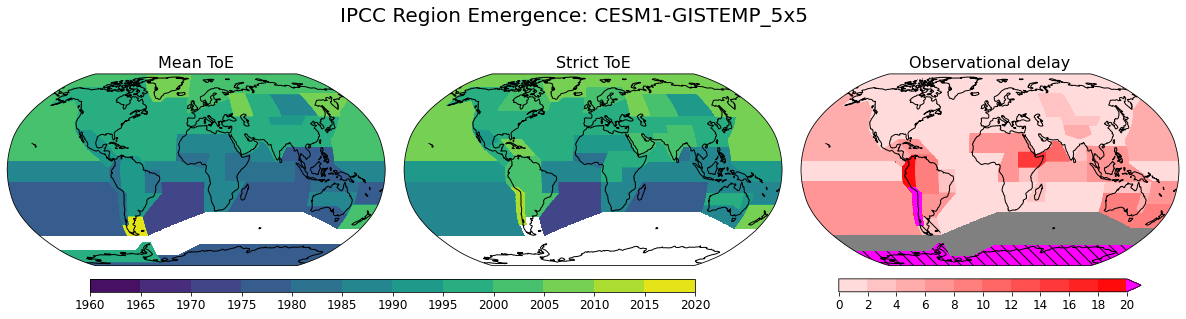

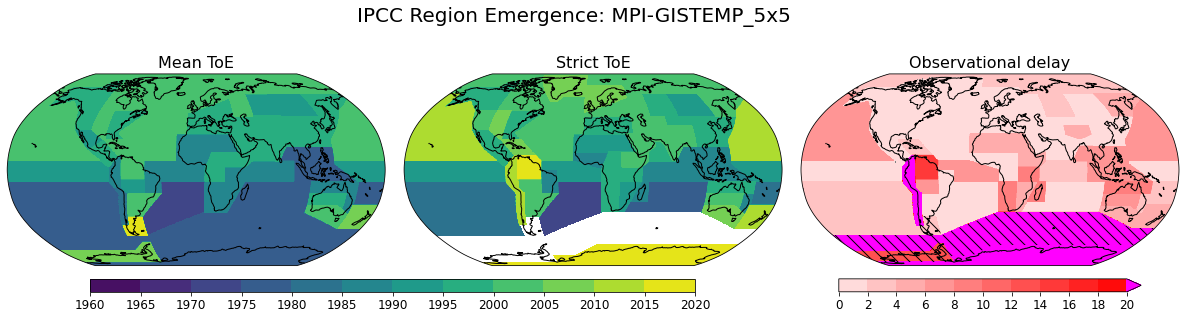

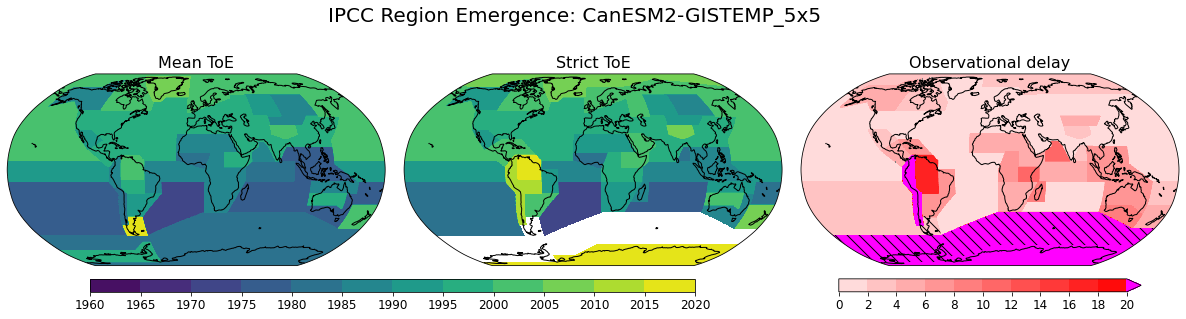

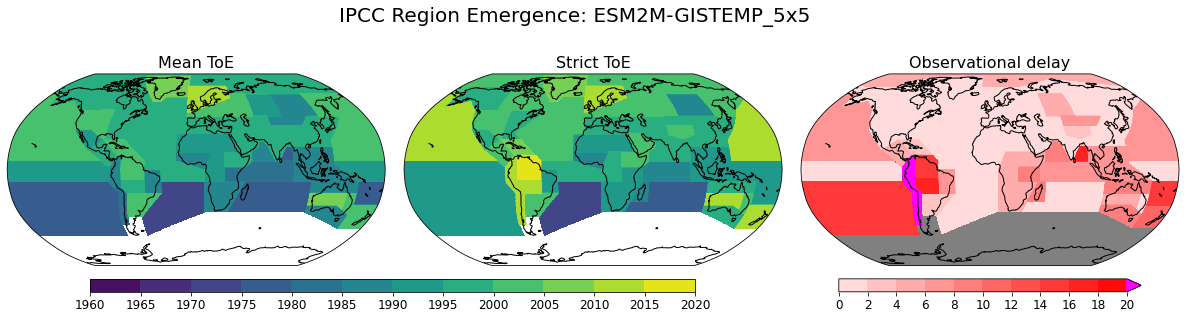

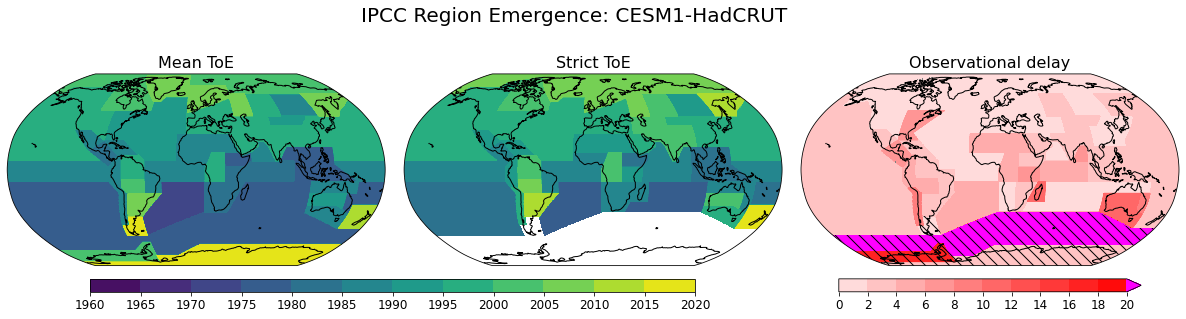

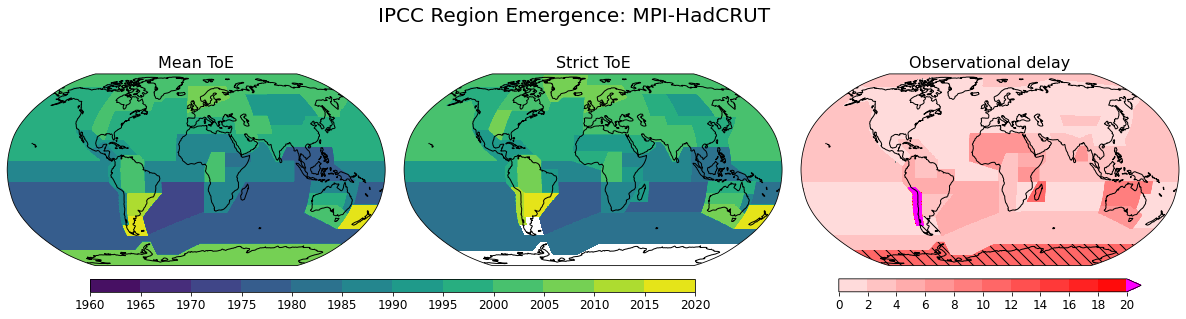

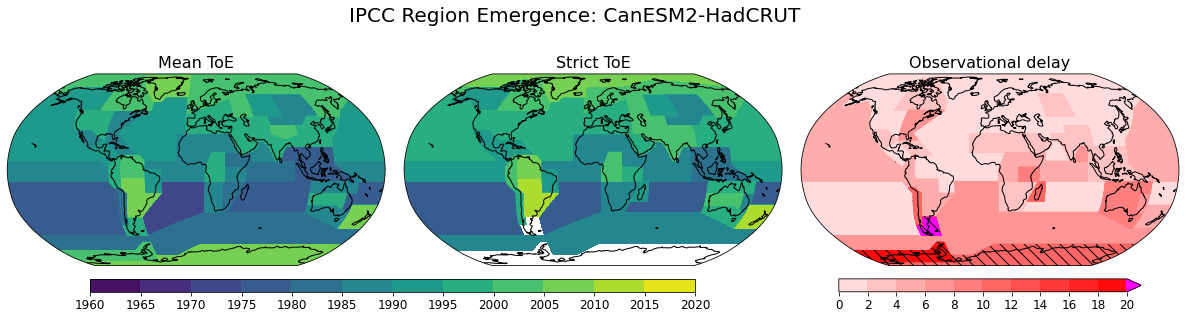

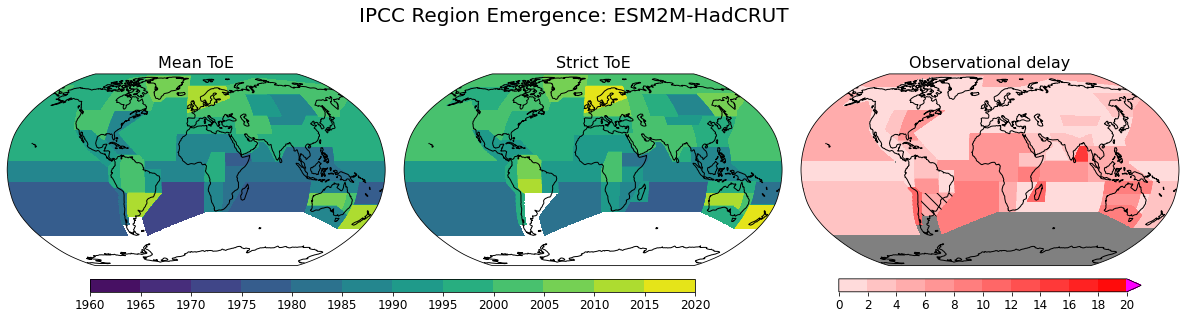

In [152]:
%%time

for _obs in regional_masked_da.obs:
        
    for _model in regional_masked_da.model:
        
        out_fig = plot_regional_toe_and_delay(regional_masked_da,obs=_obs.values,model=_model.values)
        
        to_png(file=out_fig,filename='draft1_ToE_regionalmap_%s_%s' % (_obs.values,_model.values),dpi=300,ext='png',bbox_inches='tight')

Agreement on the west coast of S. America, Australia, and Antarctica, Southern Ocean.

### Plot with Spatial Data

In [153]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

In [154]:
def plot_spatial_toe_and_delay(data,obs,model,title=True):

    data_subset = data.sel(obs=obs,model=model)
    mean_data   = data_subset.sel(metric='mean')
    strict_data = data_subset.sel(metric='strict')
    delay_data  = data_subset.sel(metric='delay')
    delay_mask  = data_subset.sel(metric='delay_mask')

    fig,axs = sp_map(1,3,projection=ccrs.Robinson(),figsize=(21,6))
    axs = axs.flat

    cax1 = plt.axes([0.175, 0.22, 0.40, 0.03])
    cax2 = plt.axes([0.685, 0.22, 0.20, 0.03])

    delay_cmap = sns.light_palette('red',n_colors=10,reverse=False,as_cmap=True)
    delay_cmap.set_over('magenta')
    delay_cmap.colorbar_extend = True
    delay_levels = list(np.linspace(0,20,11))

    masks  = [mean_data,strict_data,delay_data]
    titles = ['Mean ToE','Strict ToE','Observational delay']
    levels = [np.linspace(1960,2020,13),np.linspace(1960,2020,13),delay_levels] 
    cmaps = [mpl.cm.viridis,mpl.cm.viridis,delay_cmap]
    extend = ['neither','neither','max']

    ims = [] 
    for _ax,_mask,_label,_levels,_cmap,_extend in zip(axs,masks,titles,levels,cmaps,extend):

        _norm = BoundaryNorm(_levels, ncolors=_cmap.N, clip=False)

        im = _ax.pcolormesh(_mask.lon,_mask.lat,_mask,
                           transform=ccrs.PlateCarree(),
                           cmap=_cmap,
                           norm=_norm, 
                           )

        _ax.coastlines()
        _ax.set_global()
        _ax.set_title(_label,fontsize=16)

        ims.append(im)

    cbar1 = fig.colorbar(ims[0],orientation='horizontal',
                         ticks=np.linspace(1960,2020,13),
                         cax=cax1,
                        )

    cbar2 = fig.colorbar(ims[2],orientation='horizontal',
                         ticks=np.linspace(0,20,11), # delay_levels, 
                         cax=cax2,
                         extend='max',
                        )

    cbar1.ax.tick_params(labelsize=12) 
    cbar2.ax.tick_params(labelsize=12)

    if title:
        fig.suptitle('IPCC Region Emergence: %s-%s' % (model,obs),fontsize=20,y=0.88)    

    return fig

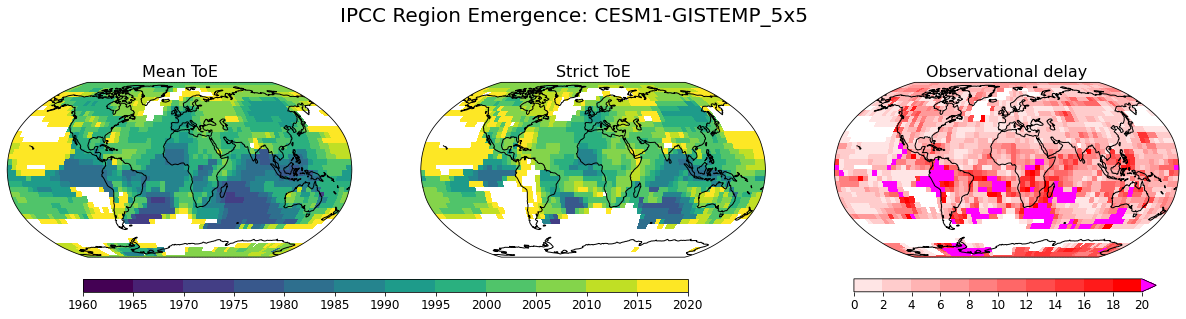

In [150]:
# User set-up
data  = spatial_box[0]
obs = 'GISTEMP_5x5' # HadCRUT
model = 'CESM1'

out = plot_spatial_toe_and_delay(data=data,obs=obs,model=model)

CPU times: user 15.7 s, sys: 556 ms, total: 16.2 s
Wall time: 18.3 s


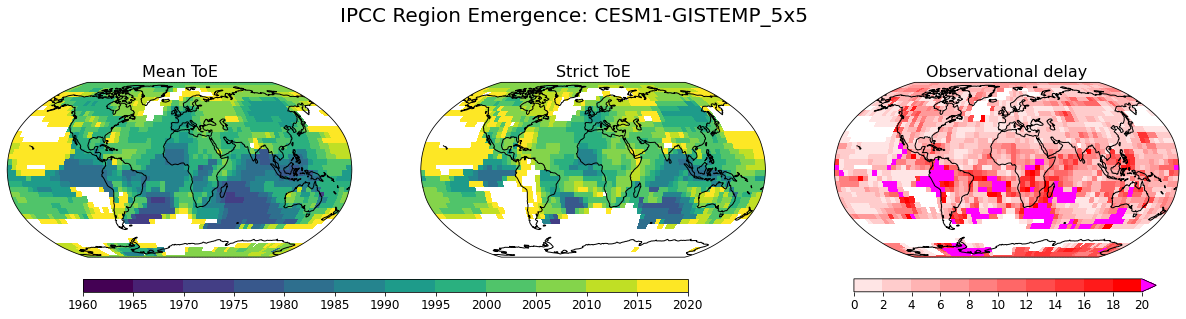

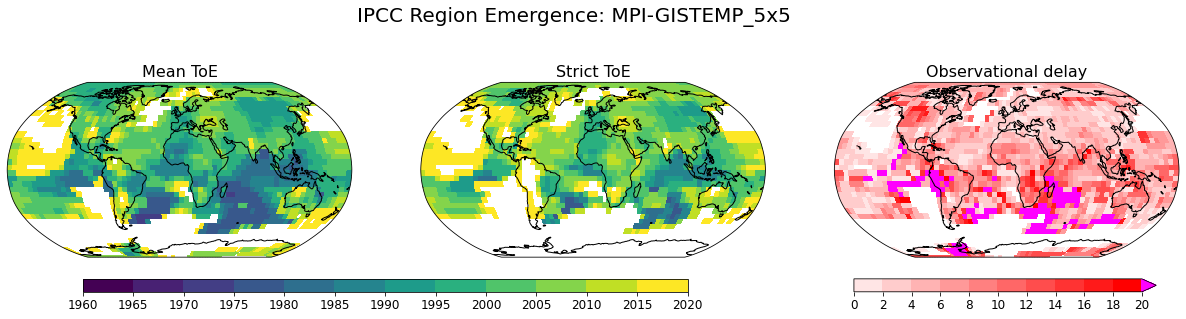

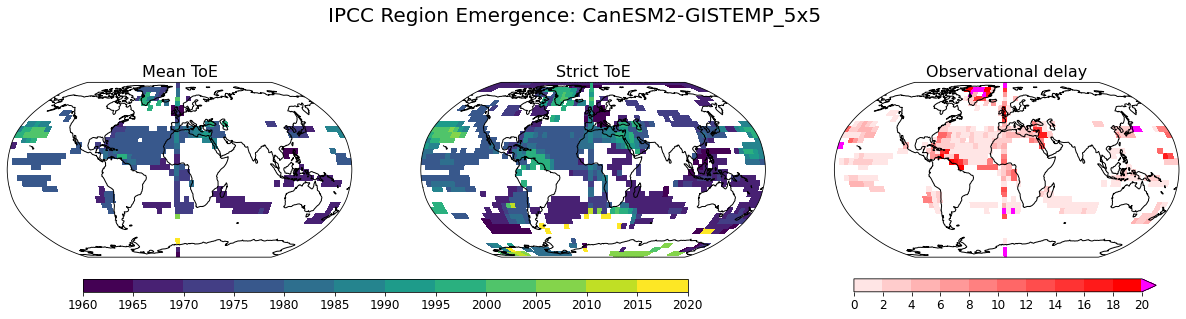

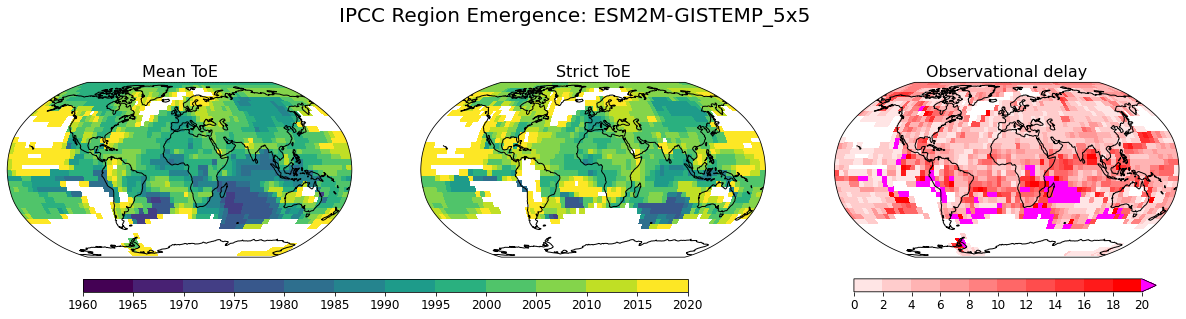

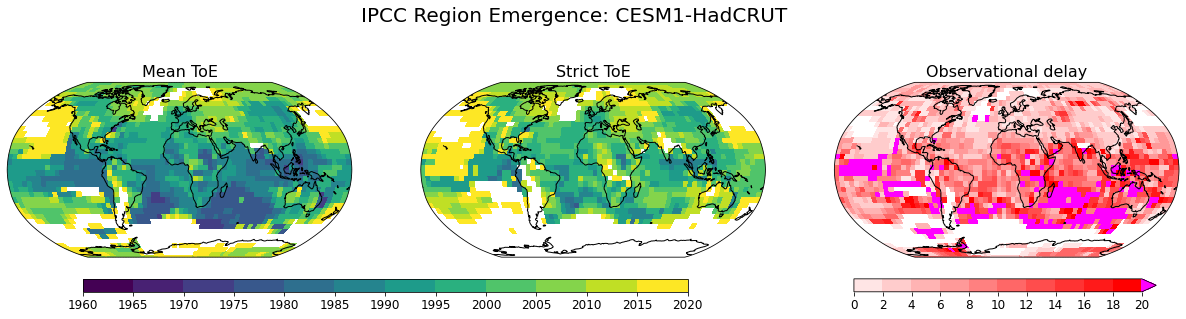

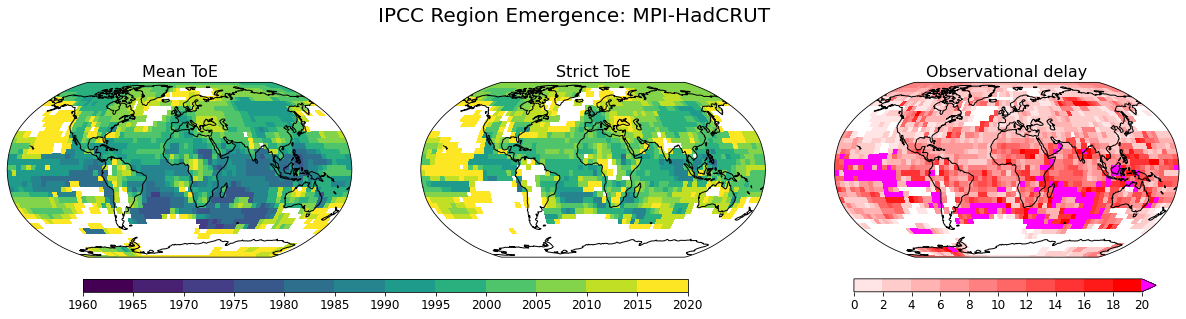

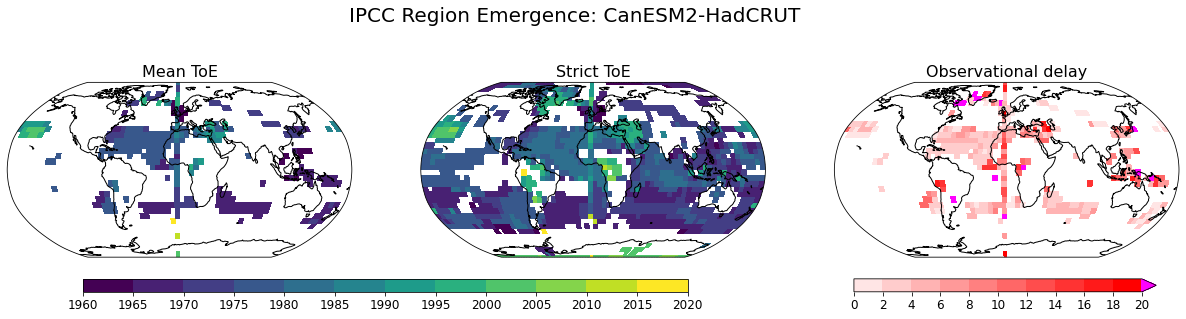

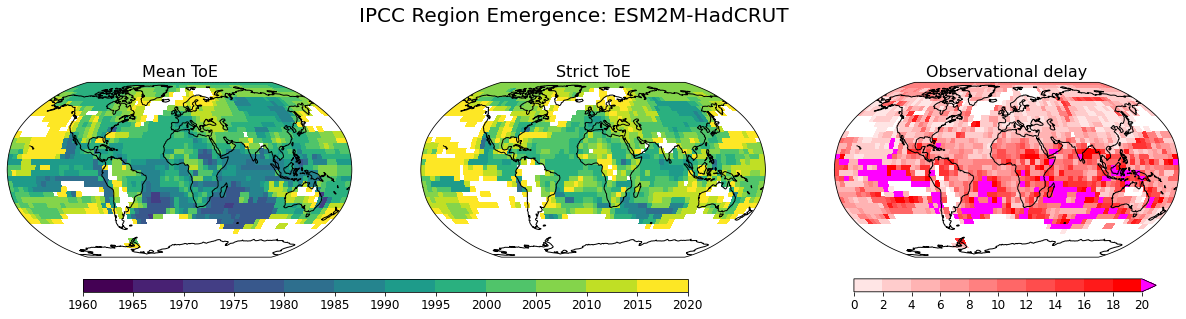

In [155]:
%%time

for _obs in regional_masked_da.obs:
        
    for _model in regional_masked_da.model:
        
        out_fig = plot_spatial_toe_and_delay(spatial_box[0],obs=_obs.values,model=_model.values)
        
        to_png(file=out_fig,filename='draft1_ToE_spatialmap_%s_%s' % (_obs.values,_model.values),dpi=300,ext='png',bbox_inches='tight')        

Something is wrong with the CanESM2 spatial data.

#### Old Code can probably delete

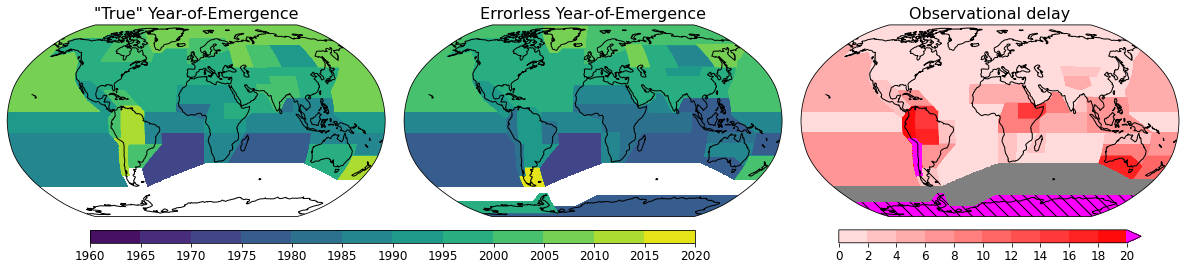

In [23]:
%%time

fig,axs = sp_map(1,3,projection=ccrs.Robinson(),figsize=(21,6))
axs = axs.flat

cax1 = plt.axes([0.18, 0.22, 0.40, 0.03])
cax2 = plt.axes([0.675, 0.22, 0.20, 0.03])

delay_cmap = sns.light_palette('red',n_colors=10,reverse=False,as_cmap=True)
delay_cmap.set_over('magenta')
delay_mask = cesm1_gistemp_2x2_delay_ukn_mask
delay_levels = list(np.linspace(0,20,11))
# masks      = [cesm1_gistemp_2x2_mean_mask,cesm1_gistemp_2x2_true_mask,(cesm1_gistemp_2x2_true_mask - cesm1_gistemp_2x2_mean_mask)]
# titles = ['Errorless Year-of-Emergence','"True" Year-of-Emergence','Observational delay']
no_meanemerge_mask = np.isnan(cesm1_gistemp_2x2_mean_mask).where(np.isnan(cesm1_gistemp_2x2_mean_mask))
masks      = [cesm1_gistemp_2x2_true_mask,cesm1_gistemp_2x2_mean_mask,(cesm1_gistemp_2x2_true_mask - cesm1_gistemp_2x2_mean_mask)]
titles = ['"True" Year-of-Emergence','Errorless Year-of-Emergence','Observational delay']
levels = [np.linspace(1960,2020,13),np.linspace(1960,2020,13),delay_levels] 
cmaps = ['viridis','viridis',delay_cmap]
extend = ['neither','neither','max']

plt.subplots_adjust(wspace=0.05)

ims = [] 
for _ax,_mask,_label,_levels,_cmap,_extend in zip(axs,masks,titles,levels,cmaps,extend):
    
    im = _ax.contourf(_mask.lon,_mask.lat,_mask, 60,
                      transform=ccrs.PlateCarree(),
                      levels=_levels,
                      cmap=_cmap,
                      extend=_extend,
                     )

    _ax.coastlines()
    _ax.set_global()
    _ax.set_title(_label,fontsize=16)
    
    ims.append(im)

im = axs[2].contourf(delay_mask.lon,delay_mask.lat,delay_mask,
                    transform=ccrs.PlateCarree(),levels=delay_levels,
                    extend='max',cmap=delay_cmap,
                    # extend='max',cmap='rocket_r',
                   )
ims.append(im)

_ = axs[2].contourf(delay_mask.lon,delay_mask.lat,delay_mask, levels=[0,2,41], colors='none',
                    transform=ccrs.PlateCarree(),
                    hatches=[None,'\\\\',],
                    extend='max',
                   )

grey = axs[2].contourf(no_meanemerge_mask.lon,no_meanemerge_mask.lat,no_meanemerge_mask,
                       transform=ccrs.PlateCarree(),
                       extend='max',colors=['none','gray'],levels=[0,0.5,1.5],
                      )

cbar1 = fig.colorbar(ims[0],orientation='horizontal',
                     ticks=np.linspace(1960,2020,13),
                     cax=cax1,
                    )

cbar2 = fig.colorbar(ims[2],orientation='horizontal',
                     ticks=np.linspace(0,20,11), # delay_levels, 
                     cax=cax2,
                    )

cbar1.ax.tick_params(labelsize=12) 
cbar2.ax.tick_params(labelsize=12) 
# cbar.set_label('Standard Deviation of 10-year TAS trends',fontsize=12)

plt.show()

I should be able to classify the delays in regions which haven't "truly" emerged using inequalities. i.e. obs-delay > 10 years

__GISTEMP__

In [35]:
mean_tte_gistemp_spatial = compute_tte(gistemp_5x5_spatial_trends_all.sel(percentile=50.0),
                                       cesm1_pic_spatial_trends_all.sel(percentile=97.5))
true_tte_gistemp_spatial = compute_tte(gistemp_5x5_spatial_trends_all.sel(percentile=2.5),
                                       cesm1_pic_spatial_trends_all.sel(percentile=97.5))

In [14]:
# If the duration with the last "False" is 3, then we needed to observe for 4 years for the signal to emerge. 
# Then the signal emerged at the end of the fourth year 1963.
# So I add 1960 to the duration of the last "False" and we report the year when the signal emerged. i.e. If we had stopped measuring then it would be emerged.

mean_tte_bool         = gistemp_5x5_spatial_trends_all.sel(percentile=50.0) > cesm1_pic_spatial_trends_all.sel(percentile=97.5)
mean_tte_gistemp      = 1960 + mean_tte_bool.duration.where(~mean_tte_bool).max(dim='duration')
mean_tte_gistemp      = mean_tte_gistemp.where(mean_tte_gistemp!=(1960+gistemp_5x5_spatial_trends_all.duration.max()),np.nan) # Mask the unemerged regions

true_tte_bool         = gistemp_5x5_spatial_trends_all.sel(percentile=2.5) > cesm1_pic_spatial_trends_all.sel(percentile=97.5)
true_tte_gistemp      = 1960 + true_tte_bool.duration.where(~true_tte_bool).max(dim='duration')
true_tte_gistemp      = true_tte_gistemp.where(true_tte_gistemp!=(1960+gistemp_5x5_spatial_trends_all.duration.max()),np.nan) # Mask the unemerged regions

In [23]:
simple_delay_gistemp = true_tte_gistemp -  mean_tte_gistemp

# Hasn't emerged in the mean sense.
fully_undef_gistemp = np.isnan(mean_tte_gistemp)

# Emerged in the mean sense but not the "true" sense.
part_undef_gistemp  = np.bitwise_and(np.isnan(true_tte_gistemp), ~np.isnan(mean_tte_gistemp))

# The conditonal delay is a lower bound, because the true signal has yet to emerge.
delay_conditional_gistemp = xr.where(part_undef_gistemp,2020 - mean_tte_gistemp,np.nan)

combined_delay_gistemp = xr.where(part_undef_gistemp,delay_conditional_gistemp,xr.where(~fully_undef_gistemp,simple_delay_gistemp,np.nan))

__HadCRUT5__

In [24]:
# If the duration with the last "False" is 3, then we needed to observe for 4 years for the signal to emerge. 
# Then the signal emerged at the end of the fourth year 1963 or the beginning of the 5th year (1964).
# So I add 1960 to the duration of the last "False" and we report the year when the signal emerged. i.e. If we had stopped measuring then it would be emerged.

mean_tte_bool    = hadcrut5_spatial_trends_all.sel(percentile=50.0) > cesm1_pic_spatial_trends_all.sel(percentile=97.5)
mean_tte_hadcrut = 1960 + mean_tte_bool.duration.where(~mean_tte_bool).max(dim='duration')
mean_tte_hadcrut = mean_tte_hadcrut.where(mean_tte_hadcrut!=(1960+hadcrut5_spatial_trends_all.duration.max()),np.nan) # Mask the unemerged regions

true_tte_bool    = hadcrut5_spatial_trends_all.sel(percentile=2.5) > cesm1_pic_spatial_trends_all.sel(percentile=97.5)
true_tte_hadcrut = 1960 + true_tte_bool.duration.where(~true_tte_bool).max(dim='duration')
true_tte_hadcrut = true_tte_hadcrut.where(true_tte_hadcrut!=(1960+hadcrut5_spatial_trends_all.duration.max()),np.nan) # Mask the unemerged regions

In [25]:
simple_delay_hadcrut = true_tte_hadcrut -  mean_tte_hadcrut

# Hasn't emerged in the mean sense.
fully_undef_hadcrut = np.isnan(mean_tte_hadcrut)

# Emerged in the mean sense but not the "true" sense.
part_undef_hadcrut  = np.bitwise_and(np.isnan(true_tte_hadcrut), ~np.isnan(mean_tte_hadcrut))

# The conditonal delay is a lower bound, because the true signal has yet to emerge.
delay_conditional_hadcrut = xr.where(part_undef_hadcrut,2020 - mean_tte_hadcrut,np.nan)

combined_delay_hadcrut = xr.where(part_undef_hadcrut,delay_conditional_hadcrut,xr.where(~fully_undef_hadcrut,simple_delay_hadcrut,np.nan))

### Plot the data

In [31]:
# If the duration with the last "False" is 3, then we needed to observe for 4 years for the signal to emerge. 
# Then the signal emerged at the end of the fourth year 1963 or the beginning of the 5th year (1964).
# So I add 1960 to the duration of the last "False" and we report the year when the signal emerged. i.e. If we had stopped measuring then it would be emerged.

mean_tte_bool = gistemp_5x5_trends_50perc > cesm1_pic_trends_97_5perc
mean_tte      = 1960 + mean_tte_bool.duration.where(~mean_tte_bool).max(dim='duration')
mean_tte      = mean_tte.where(mean_tte!=2020,np.nan) # Mask the unemerged regions

true_tte_bool = gistemp_5x5_trends_2_5perc > cesm1_pic_trends_97_5perc
true_tte      = 1960 + true_tte_bool.duration.where(~true_tte_bool).max(dim='duration')
true_tte      = true_tte.where(true_tte!=2020,np.nan) # Mask the unemerged regions

In [33]:
ipcc_ar6_regions_land   = regionmask.defined_regions.ar6.land
ipcc_ar6_regions_all    = regionmask.defined_regions.ar6.all

# unc_mask = ipcc_ar6_regions_land.mask(np.arange(-179.5, 180, 0.5),np.arange(-89.5, 90, 0.5),)
unc_mask = ipcc_ar6_regions_all.mask(np.arange(-179.5, 180, 0.5),np.arange(-89.5, 90, 0.5),)

# CESM1-GISTEMP 5x5
cesm1_gistemp_5x5_mean_mask = unc_mask.copy()
cesm1_gistemp_5x5_true_mask = unc_mask.copy()

del unc_mask

for i in ipcc_ar6_regions_all.numbers:
    
    cesm1_gistemp_5x5_mean_mask = xr.where(cesm1_gistemp_5x5_mean_mask==i,mean_tte.sel(RegionIndex=i),cesm1_gistemp_5x5_mean_mask)
    cesm1_gistemp_5x5_true_mask = xr.where(cesm1_gistemp_5x5_true_mask==i,true_tte.sel(RegionIndex=i),cesm1_gistemp_5x5_true_mask)

cesm1_gistemp_5x5_tte_ukn_mask = np.bitwise_and(np.isnan(cesm1_gistemp_5x5_true_mask),~np.isnan(cesm1_gistemp_5x5_mean_mask.values))
cesm1_gistemp_5x5_delay_ukn_mask = (2020 - cesm1_gistemp_5x5_mean_mask).where(cesm1_gistemp_5x5_tte_ukn_mask) # Calculate the minimum observational delay

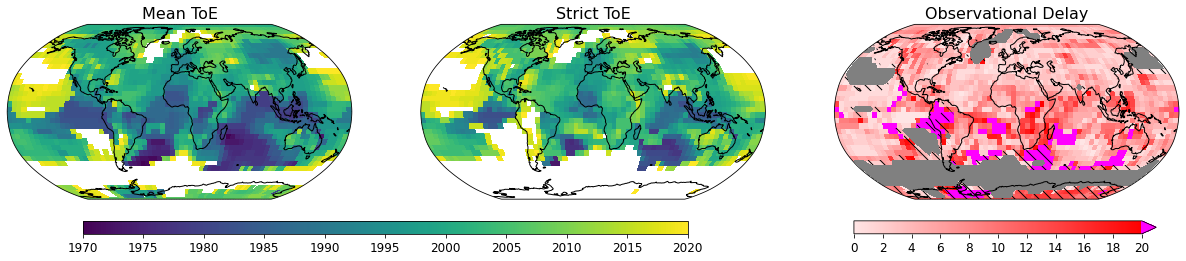

In [28]:
fig,axs = sp_map(1,3,projection=ccrs.Robinson(),figsize=(21,6))
axs = axs.flat

cax1 = plt.axes([0.175, 0.22, 0.40, 0.03])
cax2 = plt.axes([0.685, 0.22, 0.20, 0.03])

delay_cmap = sns.light_palette('red',n_colors=10,reverse=False,as_cmap=True)
delay_cmap.set_over('magenta')
delay_mask = combined_delay_gistemp

model_name = 'Mean ToE'
# model_name = 'Mean CESM1 ToE per GISTEMP 5x5'
data = mean_tte_gistemp
part_undef_mask = part_undef_gistemp
full_undef_mask = fully_undef_gistemp
# Panel 1
ax = axs[0]

im0 = ax.pcolormesh(data.lon,data.lat,data,transform=ccrs.PlateCarree(),vmin=1970,vmax=2020)

ax.coastlines()
ax.set_global()

ax.set_title(model_name,fontsize=16)#,x=0.52,y=1)

# Panel 2
ax = axs[1]

model_name = 'Strict ToE'
# model_name = 'Strict CESM1 ToE per GISTEMP 5x5'
data = true_tte_gistemp

im1 = ax.pcolormesh(data.lon,data.lat,data,transform=ccrs.PlateCarree(),vmin=1970,vmax=2020)

ax.coastlines()
ax.set_global()

ax.set_title(model_name,fontsize=16)

# Panel 3
model_name = 'Observational Delay'
# model_name = 'Observational delay per GISTEMP 5x5 and CESM1'
data = combined_delay_gistemp

ax = axs[2]

im2 = ax.pcolormesh(data.lon,data.lat,data,transform=ccrs.PlateCarree(),
                   vmin=0,vmax=20,cmap=delay_cmap)#,extend='max')

im3 = ax.contourf(part_undef_mask.lon,part_undef_mask.lat,part_undef_mask,colors='none',alpha=0,
                  levels=[-1,0.5,2],
                  transform=ccrs.PlateCarree(),hatches=[None,'\\\\'],extend='neither')

grey = ax.contourf(full_undef_mask.lon,full_undef_mask.lat,full_undef_mask,
                   transform=ccrs.PlateCarree(),
                   extend='max',colors=['none','gray'],levels=[0,0.5,1.5],
                  )

ax.coastlines()
ax.set_global()
ax.set_title(model_name,fontsize=16)


cbar1 = fig.colorbar(im0,orientation='horizontal',
                     ticks=np.linspace(1960,2020,13),
                     cax=cax1,extend="neither"
                    )

cbar2 = fig.colorbar(im2,orientation='horizontal',
                     ticks=np.linspace(0,20,11), # delay_levels, 
                     cax=cax2,extend="max"
                    )

cbar1.ax.tick_params(labelsize=12) 
cbar2.ax.tick_params(labelsize=12) 

## Regional (IPCC AR6) Data

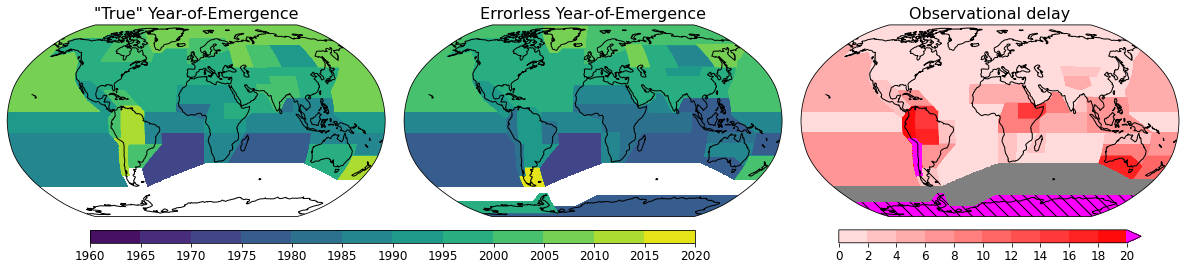

In [23]:
fig,axs = sp_map(1,3,projection=ccrs.Robinson(),figsize=(21,6))
axs = axs.flat

cax1 = plt.axes([0.18, 0.22, 0.40, 0.03])
cax2 = plt.axes([0.675, 0.22, 0.20, 0.03])

delay_cmap = sns.light_palette('red',n_colors=10,reverse=False,as_cmap=True)
delay_cmap.set_over('magenta')
delay_mask = cesm1_gistemp_2x2_delay_ukn_mask
delay_levels = list(np.linspace(0,20,11))
# masks      = [cesm1_gistemp_2x2_mean_mask,cesm1_gistemp_2x2_true_mask,(cesm1_gistemp_2x2_true_mask - cesm1_gistemp_2x2_mean_mask)]
# titles = ['Errorless Year-of-Emergence','"True" Year-of-Emergence','Observational delay']
no_meanemerge_mask = np.isnan(cesm1_gistemp_2x2_mean_mask).where(np.isnan(cesm1_gistemp_2x2_mean_mask))
masks      = [cesm1_gistemp_2x2_true_mask,cesm1_gistemp_2x2_mean_mask,(cesm1_gistemp_2x2_true_mask - cesm1_gistemp_2x2_mean_mask)]
titles = ['"True" Year-of-Emergence','Errorless Year-of-Emergence','Observational delay']
levels = [np.linspace(1960,2020,13),np.linspace(1960,2020,13),delay_levels] 
cmaps = ['viridis','viridis',delay_cmap]
# cmaps = ['viridis','viridis','rocket_r']
extend = ['neither','neither','max']

plt.subplots_adjust(wspace=0.05)

ims = [] 
for _ax,_mask,_label,_levels,_cmap,_extend in zip(axs,masks,titles,levels,cmaps,extend):
    
    im = _ax.contourf(_mask.lon,_mask.lat,_mask, 60,
                      transform=ccrs.PlateCarree(),
                      levels=_levels,
                      cmap=_cmap,
                      extend=_extend,
                     )

    _ax.coastlines()
    _ax.set_global()
    _ax.set_title(_label,fontsize=16)
    
    ims.append(im)

im = axs[2].contourf(delay_mask.lon,delay_mask.lat,delay_mask,
                    transform=ccrs.PlateCarree(),levels=delay_levels,
                    extend='max',cmap=delay_cmap,
                    # extend='max',cmap='rocket_r',
                   )
ims.append(im)

_ = axs[2].contourf(delay_mask.lon,delay_mask.lat,delay_mask, levels=[0,2,41], colors='none',
                    transform=ccrs.PlateCarree(),
                    hatches=[None,'\\\\',],
                    extend='max',
                   )

grey = axs[2].contourf(no_meanemerge_mask.lon,no_meanemerge_mask.lat,no_meanemerge_mask,
                       transform=ccrs.PlateCarree(),
                       extend='max',colors=['none','gray'],levels=[0,0.5,1.5],
                      )

cbar1 = fig.colorbar(ims[0],orientation='horizontal',
                     ticks=np.linspace(1960,2020,13),
                     cax=cax1,
                    )

cbar2 = fig.colorbar(ims[2],orientation='horizontal',
                     ticks=np.linspace(0,20,11), # delay_levels, 
                     cax=cax2,
                    )

cbar1.ax.tick_params(labelsize=12) 
cbar2.ax.tick_params(labelsize=12) 
# cbar.set_label('Standard Deviation of 10-year TAS trends',fontsize=12)

plt.show()